In [ ]:
import tensorflow as tf
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.utils import load_img


In [ ]:
lt=[cv2.ROTATE_180,cv2.ROTATE_90_COUNTERCLOCKWISE,cv2.ROTATE_90_CLOCKWISE]
def brightness(img):
  value = random.uniform(0.5,2)
  hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  hsv=np.array(hsv, dtype = np.float64)
  hsv[:,:,1] = hsv[:,:,1]*value
  hsv[:,:,1][hsv[:,:,1]>255] = 255
  hsv[:,:,2] = hsv[:,:,2]*value
  hsv[:,:,2][hsv[:,:,2]>255] = 255
  hsv=np.array(hsv, dtype = np.uint8)
  img=cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
  return img

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pathlib
import glob
directory=pathlib.Path("/content/drive/MyDrive/arts")

In [ ]:
resultant="/content/augumentedimages"

In [ ]:
items = os.listdir(directory)

classes = []
count = 0
images = []
labels = []

for i in items:
    i1 = 0
    print(i)
    classes.append(i)
    path1 = f"{directory}/{i}"
    a = random.randint(5, 10)

    while a != 0:
        img = cv2.imread(path1)
        img = cv2.resize(img, (224,224))
        k = i.split(".")[0]

        # Save the original image
        cv2.imwrite(f"{resultant}/{k}{i1}.jpeg", img)
        images.append(img)
        labels.append(count)

        img = cv2.rotate(img, lt[random.randint(0, 2)])  # Rotate the image

        # Save the rotated image
        cv2.imwrite(f"{resultant}/{k}{i1 + 1}.jpeg", img)
        images.append(img)
        labels.append(count)

        # Apply brightness adjustment (only for even rotations)
        if a % 2 == 0:
            img = brightness(img)
            # Save the brightness-adjusted image
            cv2.imwrite(f"{resultant}/{k}{i1 + 2}.jpeg", img)
            images.append(img)
            labels.append(count)

        a -= 1
        i1 += 3  # Increment by 3 for the three image variations

    count += 1

# Convert the lists to NumPy arrays
images = np.array(images, dtype=np.uint8)
labels = np.array(labels)

print(images.size)


mosaicart.jpg
3Dart.jpg
scumblingart.jpg
stipplingart.jpg
pastelart.jpg
pixelart.jpg
caricatureart.jpg
doodle.jpg
sandart.jpg
sketchart.jpg
warliart.jpg
zentangleart.jpg
36126720


In [46]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Softmax

In [47]:
model = InceptionV3(weights="imagenet", include_top=False, input_shape=(224, 224, 3))



87910968/87910968 [==============================] - 0s 0us/step


In [48]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_5[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalizati

In [49]:
transferiv=Sequential()
for i in range(18):
  transferiv.add(model.layers[i])
transferiv.add(Flatten())
transferiv.add(Dense(512,activation="relu"))
transferiv.add(Dense(218,activation="relu"))
transferiv.add(Dense(13,activation="softmax"))

In [50]:
transferiv.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 111, 111, 32)      864       
                                                                 
 batch_normalization (Batch  (None, 111, 111, 32)      96        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9216      
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 32)      96        
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 109, 109, 32)     

In [51]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):

  def on_epoch_end(self,epoch,logs={}):
    print("call")
    if(logs.get('accuracy')>.99):
       print("\nReached %2.2f%% accuracy,so stopping training !!" %(99))

       self.model.stop_training=True
callbacks=myCallback()
transferiv.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
transferiv.fit(images,labels,epochs=6,callbacks=[callbacks])


Epoch 1/6
8/8 [==============================] - 56s 7s/step - loss: 266.0357 - accuracy: 0.0792
Epoch 2/6
8/8 [==============================] - 49s 6s/step - loss: 92.7646 - accuracy: 0.2125
Epoch 3/6
8/8 [==============================] - 50s 6s/step - loss: 19.8339 - accuracy: 0.6042
Epoch 4/6
8/8 [==============================] - 51s 6s/step - loss: 4.3634 - accuracy: 0.7958
Epoch 5/6
8/8 [==============================] - 48s 6s/step - loss: 0.7705 - accuracy: 0.9458
Epoch 6/6
8/8 [==============================] - 50s 6s/step - loss: 0.3928 - accuracy: 0.9542


In [52]:
transferiv.evaluate(images,labels)

8/8 [==============================] - 16s 2s/step - loss: 130.3712 - accuracy: 0.2125


[130.37115478515625, 0.21250000596046448]

In [53]:
def predict(i,transferVGG,labels):
  path1=f"{directory}/{i}"
  img=cv2.imread(path1)
  img=cv2.resize(img,(224,224))
  a=np.argmax(transferVGG.predict(np.array([img])))
  img=cv2.putText(img,labels[a],(25,25),cv2.FONT_HERSHEY_SIMPLEX,1,(225,225,0),3,cv2.LINE_AA)
  plt.imshow(img)

In [54]:
print(classes)

['mosaicart.jpg', '3Dart.jpg', 'scumblingart.jpg', 'stipplingart.jpg', 'pastelart.jpg', 'pixelart.jpg', 'caricatureart.jpg', 'doodle.jpg', 'sandart.jpg', 'sketchart.jpg', 'warliart.jpg', 'zentangleart.jpg']


1/1 [==============================] - 0s 184ms/step


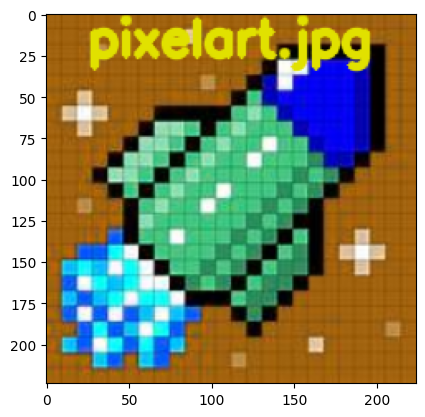

In [56]:
predict("pixelart.jpg",transferMB,classes)